In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Tips Dataset

In [29]:
tips = sns.load_dataset('tips')
train, test = train_test_split(tips, random_state=42)

In [30]:
scaler = MinMaxScaler()

numeric_columns = list(train.select_dtypes('number').columns)
train[num_vars] = scaler.fit_transform(train[num_vars])
train.head()

,total_bill,tip,sex,smoker,day,time,size
115,0.256547,0.277778,Female,No,Sun,Dinner,0.2
181,0.390146,0.516667,Male,Yes,Sun,Dinner,0.2
225,0.233466,0.166667,Female,Yes,Fri,Lunch,0.2
68,0.321349,0.112222,Male,No,Sat,Dinner,0.2
104,0.336662,0.342222,Female,No,Sat,Dinner,0.2


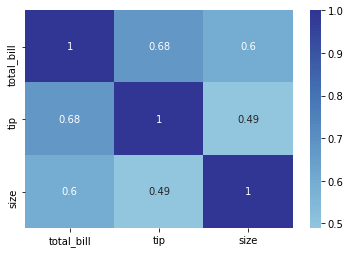

In [33]:
sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, center=0)

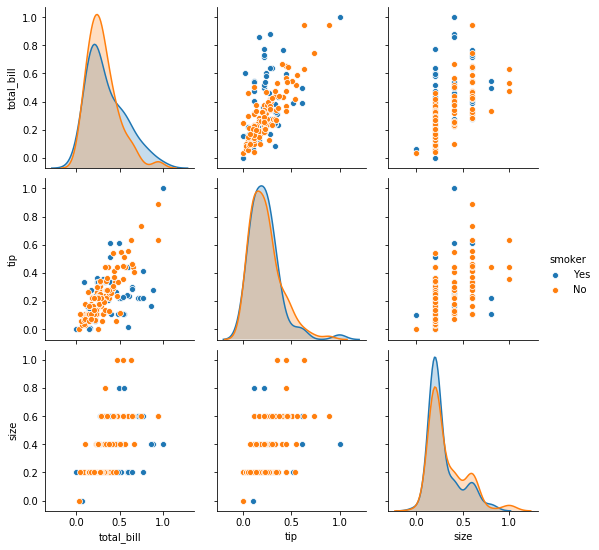

In [36]:
sns.pairplot(train, hue="smoker")

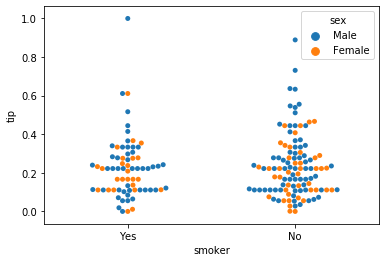

In [42]:
# Tip by smoker or gender 
sns.swarmplot(y='tip', x='smoker', data=train, hue='sex')

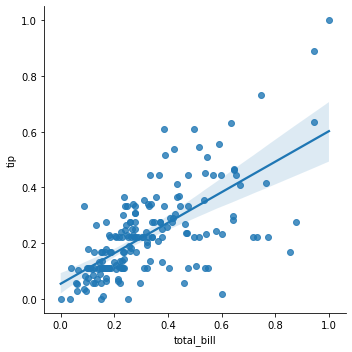

In [38]:
sns.lmplot("total_bill", "tip", data=train)

$H_0$: Total bill is independent of 